In [1]:
import fred
import datapungibea as dpb
import requests
import json
import pandas as pd
import datetime
import seaborn as sns
#Fred 


In [2]:
#Fred is a python library that can connect to FRED (Federal Reserve Bank of St Louise) databases via FRED API
#To use Fred, you need to obtain a key from FRED https://fred.stlouisfed.org/docs/api/fred/

fred.key('enter_ur_key_here')

In [3]:
#Getting M2 velocity data from FRED, 
M2_velocity = fred.observations('M2V') 
result = list()
for item in M2_velocity['observations']:
    date_string = item['date'].split("-")
    date = datetime.date(year=int(date_string[0]), month=int(date_string[1]), day=1)
    value = item['value']
    result.append((date, value))
M2_velocity = pd.DataFrame(result, columns=["date","value"])

In [4]:
PCE = fred.observations('PCE')
result = list()
for item in PCE['observations']:
    date_string = item['date'].split("-")
    date = datetime.date(year=int(date_string[0]), month=int(date_string[1]), day=1)
    value = item['value']
    result.append((date, value))
PCE = pd.DataFrame(result, columns=["date","value"])
#gdp["perc"] = gdp["value"].astype(float).pct_change(periods=4)

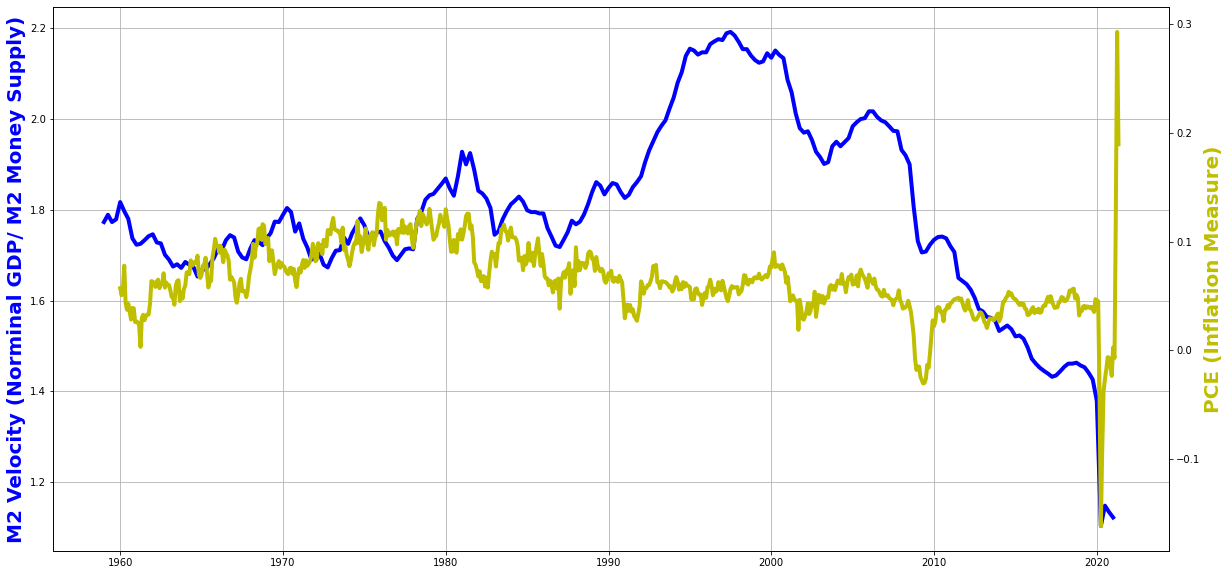

In [17]:
import matplotlib.pyplot as plt
cols = ["k", "y", "b", "orange", "lightseagreen", "darkviolet", "r"]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(M2_velocity["date"], M2_velocity["value"].astype(float), color=cols[2], linewidth=4)
ax.set_ylabel("M2 Velocity (Norminal GDP/ M2 Money Supply)",color=cols[2],fontsize=20, weight = 'bold')  
ax.grid(True)

ax2=ax.twinx()

ax2.set_ylabel("PCE (Inflation Measure)",color=cols[1],fontsize=20, weight = 'bold')  
ax2 = sns.lineplot(x=PCE["date"], y = PCE["value"].astype(float).pct_change(periods=12), color=cols[1],linewidth =4 )